In [1]:
%run ../../import_src.py
# CAUTION: NON-CONVERGENT NNLS FOR LARGE K (likely 10-12)
import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *

In [2]:
data = np.load('dataset2.npz')
X = data['X']
Y = data['Y']
X_train = data['X_train']
Y_train = data['Y_train']
X_test = data['X_test']
Y_test = data['Y_test']

ssnmf = Haddock_SSNMF(X,Y, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test, split_train_test=False)
train_results, test_results, reconerr_results = ssnmf.fulldatasearch(param_range={'k': range(6,10),'lambda': np.linspace(0,1,10), 'random_state': range(0,10)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)


best train results:  (1.0, {'k': 6, 'lambda': 0.1111111111111111, 'random_state': 1}, 12.734417511375696, 6.4427558136838625, 0.776)
best test results:  (0.82, {'k': 7, 'lambda': 0.5555555555555556, 'random_state': 2})


Best train:  1.0
Best test:  0.82


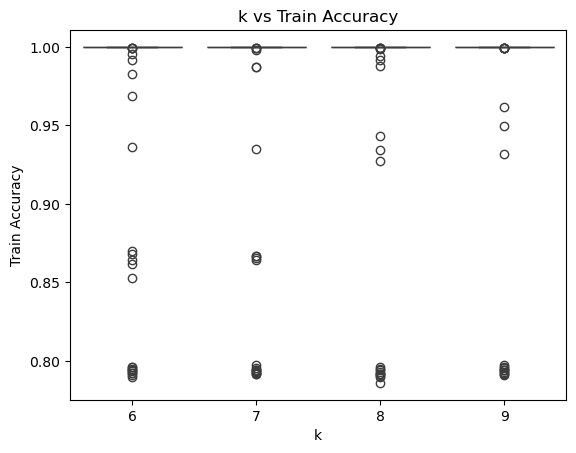

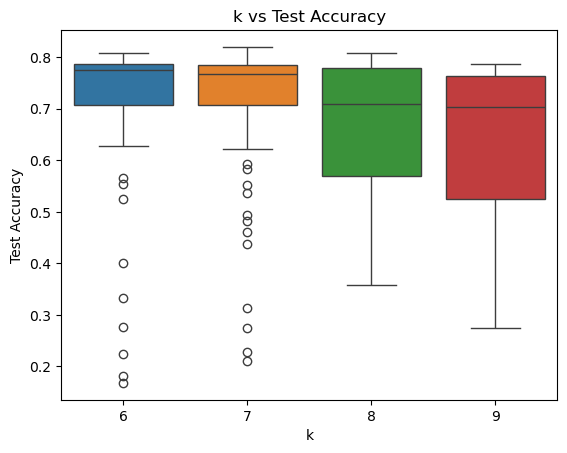

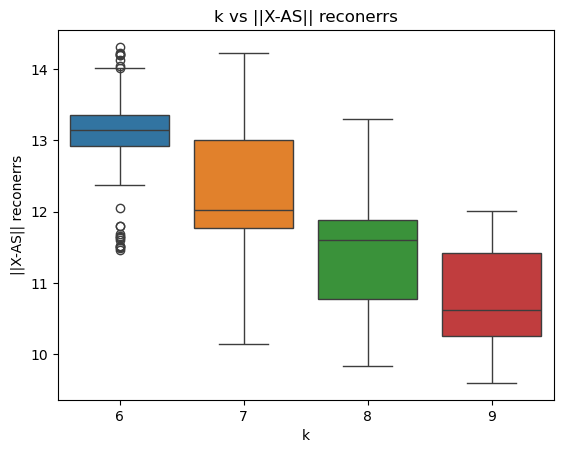

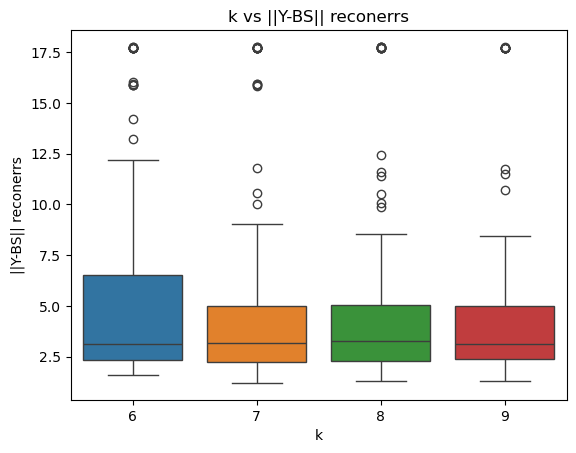

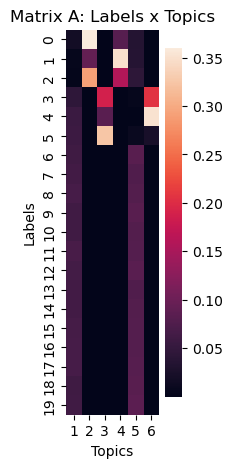

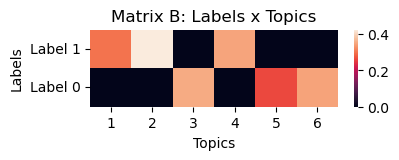

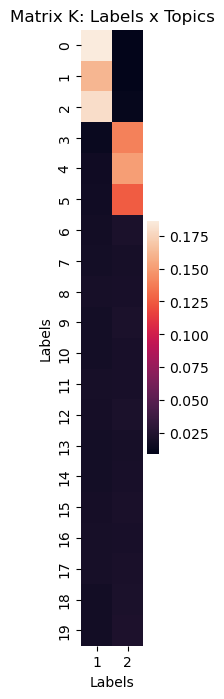

In [3]:
best_train_accu = train_results['best_train_accu']
best_train_param = train_results['best_train_param']
train_accu_distr = train_results['train_accu_distr']

best_test_accu = test_results['best_test_accu']
best_test_param = test_results['best_test_param']
test_accu_distr = test_results['test_accu_distr']

print('Best train: ', best_train_accu)
print('Best test: ', best_test_accu)

display_distr(train_accu_distr, ylabel='Train Accuracy')
display_distr(test_accu_distr, ylabel='Test Accuracy')

Xreconerr_distr = reconerr_results['Xreconerr_distr']
Yreconerr_distr = reconerr_results['Yreconerr_distr']

display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')

names = 'Labels'
labels = list(range(0, X.shape[1]))
best_model = ssnmf.get_best_fulldata_model()
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels={'Label 0','Label 1'}) 

In [4]:
# Accuracy distribution statistics
mean = train_accu_distr.mean()
Q1 = train_accu_distr.quantile(0.25)
Q3 = train_accu_distr.quantile(0.75)
print('Mean Training Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

mean = test_accu_distr.mean()
Q1 = test_accu_distr.quantile(0.25)
Q3 = test_accu_distr.quantile(0.75)
print('Mean Testing Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Training Accuracy:
6    0.971235
7    0.973070
8    0.976955
9    0.977795
dtype: float64
IQR:
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64
Mean Testing Accuracy:
6    0.72328
7    0.71786
8    0.66518
9    0.64112
dtype: float64
IQR:
6    0.0780
7    0.0760
8    0.2085
9    0.2395
dtype: float64
